### Edgar Moises Hernandez-Gonzalez
#### 01/12/19-12/12/19
#### Clasificacion de coeficientes DWT de MI-EEG con CNN
##### 10 ejecuciones independientes para obtener la media y desviacion estandar

In [0]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, precision_recall_fscore_support

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/DWT-Coef/MI-EEG-DWT-Coef-A01T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/DWT-Coef/MI-EEG-DWT-Coef-A01E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/DWT-Coef/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/DWT-Coef/EtiquetasA01E.csv", header=None)

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 22286)
(288, 22286)
(288, 1)
(288, 1)


In [7]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [8]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
#convertir de 2D a 4D
x_train = x_train.reshape((n_samples_train, 22, 1013, 1))
x_test = x_test.reshape((n_samples_test, 22, 1013, 1))

print(x_train.shape)
print(x_test.shape)

(288, 22, 1013, 1)
(288, 22, 1013, 1)


Iteration: 1
288/288 [==============================] - 0s 648us/sample - loss: 1.4035 - acc: 0.2431
kappa:  -0.0092592592592593
confusion matrix:
 [[ 0  0 69  3]
 [ 0  0 69  3]
 [ 0  0 64  8]
 [ 0  0 66  6]]
(0.13470149253731342, 0.24305555555555555, 0.12672634271099745, None)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


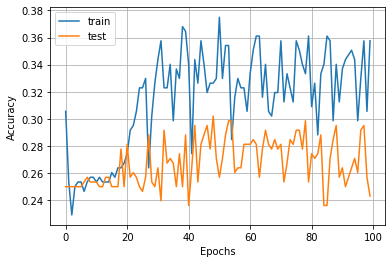

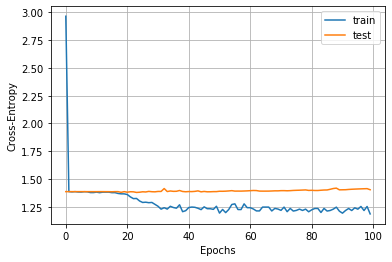

Iteration: 2
288/288 [==============================] - 0s 402us/sample - loss: 1.3863 - acc: 0.2500
kappa:  0.0
confusion matrix:
 [[72  0  0  0]
 [72  0  0  0]
 [72  0  0  0]
 [72  0  0  0]]
(0.0625, 0.25, 0.1, None)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


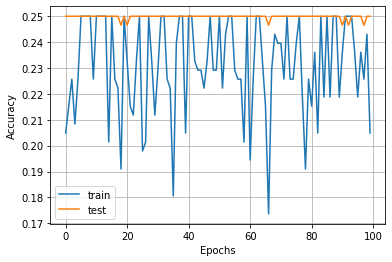

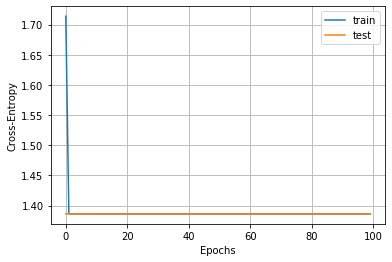

Iteration: 3
288/288 [==============================] - 0s 398us/sample - loss: 2.5602 - acc: 0.2708
kappa:  0.02777777777777779
confusion matrix:
 [[22 20 22  8]
 [20 22 18 12]
 [13 27 23  9]
 [18 22 21 11]]
(0.2729844071453661, 0.27083333333333337, 0.2661718231172959, None)


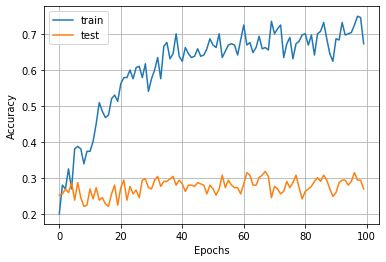

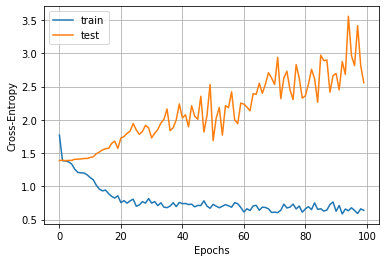

Iteration: 4
288/288 [==============================] - 0s 415us/sample - loss: 2.5562 - acc: 0.3438
kappa:  0.125
confusion matrix:
 [[17 18 21 16]
 [21 21 10 20]
 [ 9 12 22 29]
 [ 8  7 18 39]]
(0.339004757384432, 0.34375, 0.3354168960960299, None)


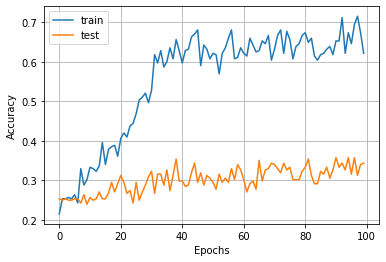

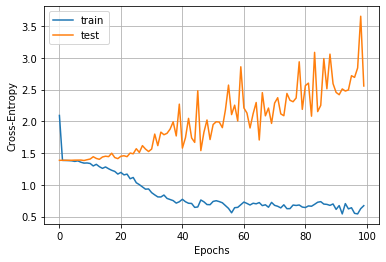

Iteration: 5
288/288 [==============================] - 0s 406us/sample - loss: 2.5553 - acc: 0.3681
kappa:  0.15740740740740744
confusion matrix:
 [[26 17  3 26]
 [17 29  1 25]
 [11 12  9 40]
 [12  6 12 42]]
(0.38071346690590113, 0.3680555555555556, 0.3496513225771116, None)


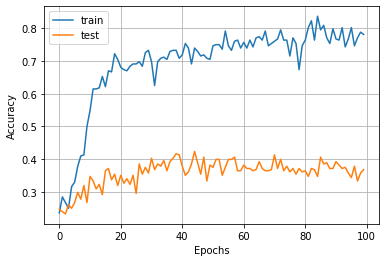

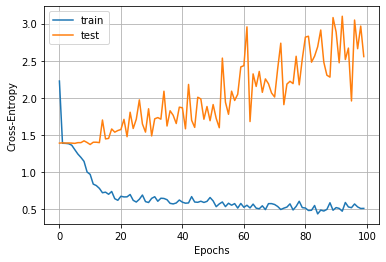

Iteration: 6
288/288 [==============================] - 0s 398us/sample - loss: 1.4917 - acc: 0.3715
kappa:  0.1620370370370371
confusion matrix:
 [[29 23 15  5]
 [34 31  4  3]
 [25  6 19 22]
 [17  5 22 28]]
(0.38813471011746875, 0.3715277777777778, 0.3747215947481938, None)


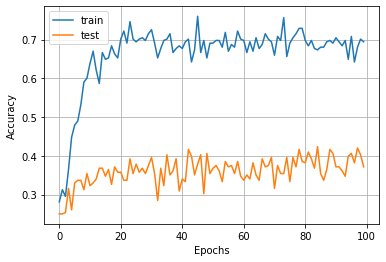

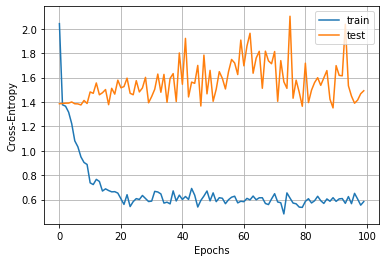

Iteration: 7
288/288 [==============================] - 0s 413us/sample - loss: 2.6055 - acc: 0.3125
kappa:  0.08333333333333337
confusion matrix:
 [[35 13  9 15]
 [47  7  7 11]
 [21  7 13 31]
 [14  6 17 35]]
(0.29357749738184524, 0.3125, 0.28771798876180854, None)


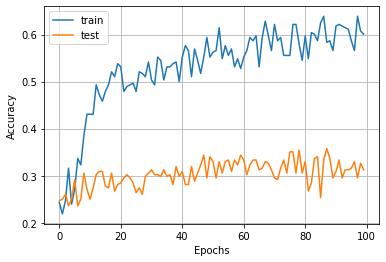

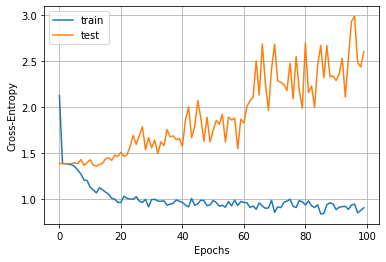

Iteration: 8
288/288 [==============================] - 0s 391us/sample - loss: 2.8016 - acc: 0.3333
kappa:  0.11111111111111116
confusion matrix:
 [[23 12 20 17]
 [26 19 17 10]
 [10  9 19 34]
 [ 5  7 25 35]]
(0.3406953884292093, 0.3333333333333333, 0.3306489262371615, None)


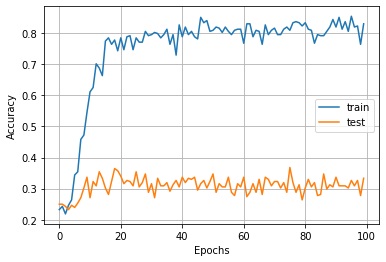

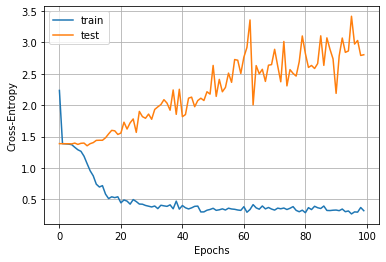

Iteration: 9
288/288 [==============================] - 0s 380us/sample - loss: 2.9250 - acc: 0.3021
kappa:  0.06944444444444442
confusion matrix:
 [[40  7  8 17]
 [35  8  9 20]
 [29  6 11 26]
 [29  8  7 28]]
(0.29964799266069686, 0.30208333333333337, 0.27445637571682147, None)


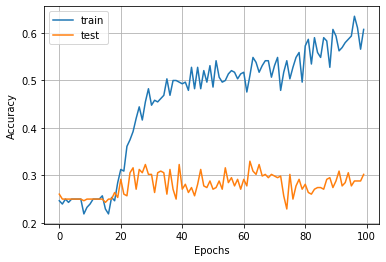

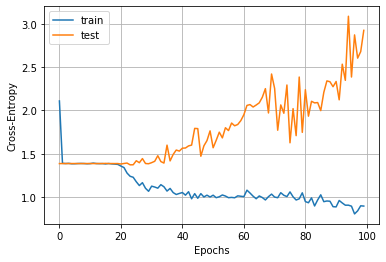

Iteration: 10
288/288 [==============================] - 0s 479us/sample - loss: 3.4215 - acc: 0.3021
kappa:  0.06944444444444442
confusion matrix:
 [[46  5  1 20]
 [53  7  0 12]
 [32  6  2 32]
 [31  6  3 32]]
(0.31057098765432095, 0.3020833333333333, 0.2428075396825397, None)


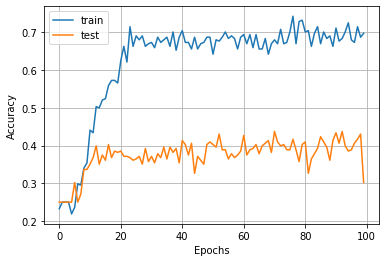

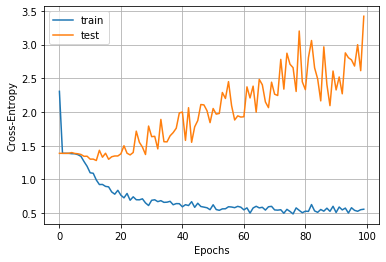


Resultados:
loss: [1.4034806622399225, 1.386296100086636, 2.5601989560657077, 2.556170450316535, 2.5553483963012695, 1.491665177875095, 2.605545997619629, 2.8015959792666965, 2.9249500036239624, 3.421543174319797]
accuracy: [0.24305555, 0.25, 0.27083334, 0.34375, 0.36805555, 0.3715278, 0.3125, 0.33333334, 0.30208334, 0.30208334]
kappa: [-0.0092592592592593, 0.0, 0.02777777777777779, 0.125, 0.15740740740740744, 0.1620370370370371, 0.08333333333333337, 0.11111111111111116, 0.06944444444444442, 0.06944444444444442]
precision: [0.13470149253731342, 0.0625, 0.2729844071453661, 0.339004757384432, 0.38071346690590113, 0.38813471011746875, 0.29357749738184524, 0.3406953884292093, 0.29964799266069686, 0.31057098765432095]
recall: [0.24305555555555555, 0.25, 0.27083333333333337, 0.34375, 0.3680555555555556, 0.3715277777777778, 0.3125, 0.3333333333333333, 0.30208333333333337, 0.3020833333333333]
f1: [0.12672634271099745, 0.1, 0.2661718231172959, 0.3354168960960299, 0.3496513225771116, 0.37472159

In [16]:
array_test_loss = []
array_test_acc = []
array_kappa = []
array_precision = []
array_recall = []
array_f1 = []
for i in range(10):
    print("Iteration:", i+1);
    
    model = Sequential()
    model.add(Conv2D(16, (3,3), activation='relu', input_shape=(22,1013,1)))
    model.add(MaxPool2D((2,2)))
    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(MaxPool2D((2,2)))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, batch_size=18, validation_data=(x_test, y_test), verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    array_test_loss.append(test_loss)
    array_test_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    kappa = cohen_kappa_score(y_test, y_pred)
    print("kappa: ", kappa)
    array_kappa.append(kappa)
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    metricas = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(metricas)
    array_precision.append(metricas[0])
    array_recall.append(metricas[1])
    array_f1.append(metricas[2])
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_test_loss)
print("accuracy:", array_test_acc)
print("kappa:", array_kappa)
print("precision:", array_precision)
print("recall:", array_recall)
print("f1:", array_f1)

In [17]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 20, 1011, 16)      160       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 10, 505, 16)       0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 8, 503, 32)        4640      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 4, 251, 32)        0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 32128)             0         
_________________________________________________________________
dense_40 (Dense)             (None, 32)                1028128   
_________________________________________________________________
dropout_20 (Dropout)         (None, 32)              

In [19]:
print("Mean: %.4f" % np.mean(array_test_acc))
print("std: (+/- %.4f)" % np.std(array_test_acc))
print("kappa: %.4f" % np.mean(array_kappa))
print("precision: %.4f" % np.mean(array_precision))
print("recall: %.4f" % np.mean(array_recall))
print("f1: %.4f" % np.mean(array_f1))

Mean: 0.3097
std: (+/- 0.0431)
kappa: 0.0796
precision: 0.2823
recall: 0.3097
f1: 0.2688
